In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/dk/ht9wngxs4r51l9tbk0_y94000000gp/T/ipykernel_11970/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Natural Language Processing
## Part I

# Table of contents

1. Data Cleaning and text analysis

2. Regular expressions and examples

3. Data cleaning:

   3.1 Tokenizing text into bags of words
   
   3.2 Removing punctuation
   
   3.3 Stemming and Lemmatizing
   
   3.4 Removing HTML entities and tags

4. Text representation
   
   4.1 TF-IDF: Term frequencies (counter)
   
   4.2 Vector normalization
   
   4.3 Feature weighting (Inverse Document Frequency)
   
   4.4 Sklearn implementation

5. Learning text representations
   
   5.1 Stopwords
   
   5.2 Bag of Words (BoW)
   
   5.3 N-grams
   
   5.4 Training a (naive Bayes) Classifier with TextBlob: A Tweet Sentiment Analyzer
   
   5.5 Read data from moneycontrol

# 1. Data cleaning and text analysis

<img src="https://miro.medium.com/max/2392/0*1-i9w0e4kklVQl5B.jpg">

It is estimated that 80% of the data is **unstructured**

And **unstructured** data is basically **text data**!

Text is present in every major business process, from support tickets to product feedback and customer interactions.

There is not doubt that text analysis has a broad range of business applications and use cases:
* Understand customer 
* Risk managment
* Prediction and prevention of crime
* Personalized adversitsing
* ...

#### Is text data used in your company? 


#### How do you used?


#### Social Media Monitoring?
Let's say you work for NIKE and you want to know what the users say about the company. Every day there are thousands of tweets that can provide us really interesting insights, however these data can not be analyzed manually. Some questions:
   * Is the sentiment about the company positive or negative?
   * What are they compeling?
   * What do they say about a the new AIR MAX shoes?

$\bullet$ **Objectives**: 
    * Write scripts for data cleaning (data formatting, text categorization, etc.). 
    * Extract features from unstructured data. Understand and use tools for representing natural language data. 
    * Show examples for sentiment analysis tasks.

$\bullet$ Topics: Data cleaning; Regular Expression; How to represent natural language: tf-idf, n-grams; Tools for NLP (NLTK, Pattern).

# 2. Regular expressions and examples:


- Textual data cleaning/processing:
    
    * Tokenining - convert sentences to words
    
    * Removing unnecessary punctuation
    
    * Tags
    
    * Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
    
    * Stemming and Lemmatizing - words are reduced to a root by removing inflection

- Text representation
    
    * TF-IDF: Term frequencies (counter)
    
    * Vector normalization
    
    * Feature weighting (Inverse Document Frequency)	
    
    * Sklearn implementation

- Learning text representations
    * Stopwords
    * Bag of Words
    * n-grams
    * Training a (naive Bayes) Classifier with NLTK: film critiques example
    * Training a (naive Bayes) Classifier with TextBlob: A Tweet Sentiment Analyzer
    * Pattern module

The concept Regular Expression arose in the 1950s, when the American mathematician Stephen Kleene formalized the description of a regular language, and came into common use with the Unix text processing utilities ed, an editor, and grep (global regular expression print), a filter.
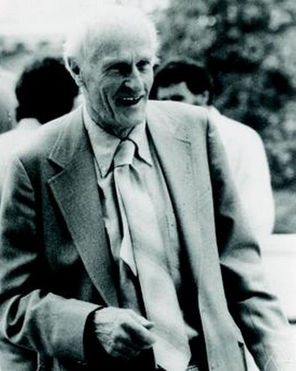

A regular expression processor translates a regular expression into a nondeterministic finite automaton (NFA) (where several states can be the output of a given state and symbol), which is then made deterministic (only one possible state transition for a particular symbol) and run on the target text string to recognize substrings that match the regular expression. 

In other words: Regular expression is a group of characters or symbols which is used to find a specific pattern from some text.


1956."Representation of Events in Nerve Nets and Finite Automata" in Automata Studies. Claude Shannon and John McCarthy, eds.
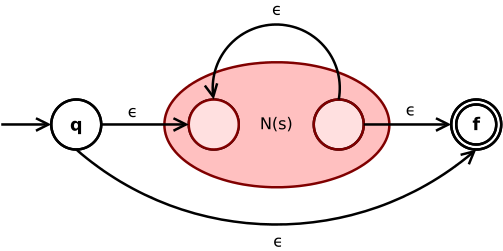

You write regular expressions (regex) to match patterns in strings. When you are processing text, you may want to extract a substring of some predictable structure: a phone number, an email address, or something more specific to your research or task. You may also want to clean your text of some kind of junk: maybe there are repetitive formatting errors due to some transcription process that you need to remove.

In these cases and in many others like them, writing the right regex will be a good choice.

In [7]:
import re #the regex module in the python standard library

#strings to be searched for matching regex patterns
str1 = "varks Aard belíng to the Captain"
str2 = "Albert's famous equation, E = mc^2."
str3 = "Located at 455 Serra Mall."
str4 = "Beware of the shape-shifters!"

test_strings = [str1, str2, str3, str4] #created a list of strings

In [8]:
for test_string in test_strings:
    print ('\nThe test string is "' + test_string + '"')
    match = re.search('[í]', test_string)
    # r'' raw strings, do not interpret inside special characters, such as \
    # u'' unicode
    if match:
        print ('- The first possible match is: ' + match.group())
    else:
        print ('- ** no match. **')


The test string is "varks Aard belíng to the Captain"
- The first possible match is: í

The test string is "Albert's famous equation, E = mc^2."
- ** no match. **

The test string is "Located at 455 Serra Mall."
- ** no match. **

The test string is "Beware of the shape-shifters!"
- ** no match. **


Let's go through the code above line by line:

<code>
for test_string in test_strings:
</code>

test_strings is a list, and so it is iterable in a for loop. Every element in this list is a string. So for the rest of the for loop, we will be referring to the current element as test_string

<code>
print 'The test string is "' + test_string + '"'
</code>

This just prints out the current object we're iterating over

<code>
match = re.search(r'[A-Z]', test_string)
</code>

You give a searcher (in this case, the function re.search() a pattern and a string in which to find matches. That's exactly what this line does. re.search() returns either an object of type SRE_Match or None. 

<code>
if match:
    print 'The first possible match is: ' + match.group()
else:
    print 'no match.'
</code>    

match is an object that has two possible states: SRE_Match or None. None is a type of object that returns false in a logical test. In this for loop, we've basically told the Python interpreter to check whether match is NoneType or not. If it isn't, we return a string plus match.group(). group() is a method that has SRE_Match objects. It will return the substring that matched the pattern defined.


Note that since we are using re.search, only a single character is returned. That's because of the following:

<ol>
<li>We only defined a single character pattern and</li>
<li>re.search finds the first possible match and then doesn't look for any more.</li>
</ol>


If you want to find all possible matches in a string, you can use re.findall(), which will return a list of all matches:

In [9]:
for string in test_strings:
    print(string)
    print ("-" , re.findall(r'[A-Z]', string),"\n")

varks Aard belíng to the Captain
- ['A', 'C'] 

Albert's famous equation, E = mc^2.
- ['A', 'E'] 

Located at 455 Serra Mall.
- ['L', 'S', 'M'] 

Beware of the shape-shifters!
- ['B'] 



You can also compile your regex ahead of time. This will create SRE_Pattern objects. There are many performance reasons to do this. Additionally, you can create lists of these objects and iterate over both strings and patterns more easily. Here's an example:

In [10]:
patterns = [re.compile(r'[ABC]'),
re.compile(r'[^ABC]'), # everything except ABC
re.compile(r'[ABC^]'), # ^ detected as symbol
re.compile(r'[0123456789]'), 
re.compile(r'[0-9]'),
re.compile(r'[0-4]'),
re.compile(r'[A-Z]'),
re.compile(r'[A-Za-z]'),
re.compile(r'[A-Za-z0-9]'),
re.compile(r'[-a-z]'),
re.compile(r'[- a-z]')]

def find_match(pattern, string):
    match = re.search(pattern, string)
    if match:
        return match.group()
    else:
        return 'no match.'
    
for test_string in test_strings:
    matches = [find_match(pattern, test_string) for pattern in patterns]
    print("In: \""+ test_string+"\"")
    for pattern in patterns:
        print (' - The first potential match for "' + pattern.pattern + ' \t is: ' + matches[patterns.index(pattern)])

In: "varks Aard belíng to the Captain"
 - The first potential match for "[ABC] 	 is: A
 - The first potential match for "[^ABC] 	 is: v
 - The first potential match for "[ABC^] 	 is: A
 - The first potential match for "[0123456789] 	 is: no match.
 - The first potential match for "[0-9] 	 is: no match.
 - The first potential match for "[0-4] 	 is: no match.
 - The first potential match for "[A-Z] 	 is: A
 - The first potential match for "[A-Za-z] 	 is: v
 - The first potential match for "[A-Za-z0-9] 	 is: v
 - The first potential match for "[-a-z] 	 is: v
 - The first potential match for "[- a-z] 	 is: v
In: "Albert's famous equation, E = mc^2."
 - The first potential match for "[ABC] 	 is: A
 - The first potential match for "[^ABC] 	 is: l
 - The first potential match for "[ABC^] 	 is: A
 - The first potential match for "[0123456789] 	 is: 2
 - The first potential match for "[0-9] 	 is: 2
 - The first potential match for "[0-4] 	 is: 2
 - The first potential match for "[A-Z] 	 is: A
 

Let's go over this code line by line: 

<code>
patterns = [re.compile(r'[ABC]'),
re.compile(r'[^ABC]'),
re.compile(r'[ABC^]'),
re.compile(r'[0123456789]'),
re.compile(r'[0-9]'),
re.compile(r'[0-4]'),
re.compile(r'[A-Z]'),
re.compile(r'[A-Za-z]'),
re.compile(r'[A-Za-z0-9]'),
re.compile(r'[-a-z]'),
re.compile(r'[- a-z]')]
</code>

This creates a list of SRE_Patterns.

In [11]:
print (patterns)

[re.compile('[ABC]'), re.compile('[^ABC]'), re.compile('[ABC^]'), re.compile('[0123456789]'), re.compile('[0-9]'), re.compile('[0-4]'), re.compile('[A-Z]'), re.compile('[A-Za-z]'), re.compile('[A-Za-z0-9]'), re.compile('[-a-z]'), re.compile('[- a-z]')]


In [12]:
print (patterns[1])
print (patterns[1].pattern)

re.compile('[^ABC]')
[^ABC]


<code>
def find_match(pattern, string):
    match = re.search(pattern, string)
    if match:
        return match.group()
    else:
        return 'no match.'
</code>

We defined a function find_match that expects some variables called pattern and string. Notice that this function is very similar to the logical condition testing from the code above. Note also that this function returns either the match.group() or a string "no match."

<code>
for test_string in test_strings:
    matches = [find_match(pattern, test_string) for pattern in patterns]
<code>

By defining the find_match() function above, I can then call it from within a list comprehension. In words, for each string test_string that is in test_strings, we compare against the list of patterns and return matches. The resulting list of matches should be the same length as patterns; one match per pattern tested. 

<code>
for pattern in patterns:
        print 'The first potential match for "' + pattern.pattern + '" in "' + test_string + '" is: ' + matches[patterns.index(pattern)]
</code>

Because we wanted to print some diagnostic code, we need to iterate over each pattern in patterns (a list and thus iterable) and print it out, along with the test string. If you want to get the pattern out of an SRE_Pattern object, you can call its member method .pattern and it will return the regex pattern as a string. Since we are nesting this loop within the bigger loop above, this loop will go over every pattern in the patterns list for each string, and then repeat for the next string in the list test_strings.

However, note that we are dynamically referring to the index of the matches list:

<code>
matches[patterns.index(pattern)]
</code>

#### Compiling regular expressions

<p>Compiling regular expressions as in the previous example can improve performance if you are using the same regular expression multiple times.</p>
<pre><code>compiled_re = re.compile(r'some_regexpr')    
for word in text:
    match = comp.search(compiled_re)
    # do something with the match
</code></pre><p><strong>E.g., if we want to check if a string ends with a substring:</strong></p>

In [13]:
import re

needle = 'needlers'

# Python approach
print (any([needle.endswith(e) for e in ('ly', 'ed', 'ing', 'ers')]))

# On-the-fly Regular expression in Python
print(bool(re.search(r'(ly|ed|ing|ers)$', needle)))

# Compiled Regular expression in Python
comp = re.compile(r'(ly|ed|ing|ers)$') 
print(bool(comp.search(needle)))

True
True
True


In [14]:
bool(re.search(r'(ly|ed|ing|ers)$', needle))

True

A que hace referencia cada variable incial
r - raw data
u - unicode

In [15]:
%timeit -n 1000 -r 50 bool(any([needle.endswith(e) for e in ('ly', 'ed', 'ing', 'ers')]))
%timeit -n 1000 -r 50 bool(re.search(r'(ly|ed|ing|ers)$', needle))
%timeit -n 1000 -r 50 bool(comp.search(needle))

The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached.
2.23 µs ± 974 ns per loop (mean ± std. dev. of 50 runs, 1,000 loops each)
The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1.74 µs ± 672 ns per loop (mean ± std. dev. of 50 runs, 1,000 loops each)
804 ns ± 197 ns per loop (mean ± std. dev. of 50 runs, 1,000 loops each)


### Summary of terms for regular expressions

<p><strong><span style="color:red">[ ]</span></strong> - one element inside has to match.</p>
<p><strong><span style="color:red">|</span></strong> - or element.</p>
<p><strong><span style="color:red">{ }</span></strong> - to set an interval or number of times repetition.</p>
<p><strong><span style="color:red">\</span></strong> - identify next character as a character and not regular expression symbol.</p>
<p><strong><span style="color:red">. (Dot.)</span></strong> - In the default mode, this matches any character except a newline. </p>
<p><strong><span style="color:red">^ (Caret.)</span></strong> - Matches the start of the string, and in MULTILINE mode also matches immediately after each newline.</p>
<p><strong><span style="color:red">$</span></strong> - Matches the end of the string or just before the newline at the end of the string, and in MULTILINE mode also matches before a newline. </p>
<p><strong><span style="color:red">*</span></strong> - Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. ab* will match ‘a’ or ‘ab’ followed by any number of ‘b’s.</p>
<p><strong><span style="color:red">+</span></strong> - Causes the resulting RE to match 1 or more repetitions of the preceding RE. ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.</p>
<p><strong><span style="color:red">?</span></strong> - Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. ab? will match either ‘a’ or ‘ab’.</p>
<ul>
<li><span style="color:red">\d </span>- Matches any decimal digit; this is equivalent to the class [0-9].</li>
<li><span style="color:red">\D </span>- Matches any non-digit character; this is equivalent to the class [^0-9].</li>
<li><span style="color:red">\s </span>- Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].</li>
<li><span style="color:red">\S </span>- Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].</li>
<li><span style="color:red">\w </span>- Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].</li>
<li><span style="color:red">\W </span>- Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].</li>
</ul>
<p>For more comprehesive and complete documentation, ref: <a href="http://docs.python.org/2/library/re.html#re-syntax">http://docs.python.org/2/library/re.html#re-syntax</a>

#### Pre-defined character classes example

In [ ]:
patterns2 = [
re.compile(r'\w'),
re.compile(r'\W'),
re.compile(r'\d'),
re.compile(r'\D'),
re.compile(r'\s'),
re.compile(r'\S')]

test_strings.append('Aardvarks belong to the Captain, capt_hook')

for test_string in test_strings:
    matches = [find_match(pattern, test_string) for pattern in patterns2]
    print('In: "' + test_string +'"')
    for pattern in patterns2:
        print (' - The first potential match for "' + pattern.pattern + '" is: ' + matches[patterns2.index(pattern)])
    print()

#### Examples matching sequences with regular expressions

In [ ]:
test_strings2 = ["The Aardvarks belong to the Captain.",
                 "Bitter butter won't make the batter better.",
                 "Hark, the pitter patter of little feet!"]

patterns3 = [re.compile(r'(Aa)'),
re.compile(r'[Aa][Aa]'),
re.compile(r'[aeiou][aeiou]'),
re.compile(r'[AaEeIiOoUu][aeiou]'),
re.compile(r'[Tt]he'),
re.compile(r'^[Tt]he'),
re.compile(r'n.'),
re.compile(r'n.$'),
re.compile(r'\W\w'),
re.compile(r'\w[aeiou]tter'),
re.compile(r'..tt..')]

for test_string in test_strings2:
    matches = [find_match(pattern, test_string) for pattern in patterns3]
    print('In: "' + test_string +'"')
    for pattern in patterns3:
        print (' - The first potential match for "' + pattern.pattern + '" is: ' + matches[patterns3.index(pattern)])
    print()

In [ ]:
def find_all_matches(pattern, string):
    matches = re.findall(pattern, string)
    if matches:
        return matches
    else:
        return None

for test_string in test_strings2:
    matches = [find_all_matches(pattern, test_string) for pattern in patterns3]
    print('In: "' + test_string +'"')
    for pattern in patterns3:
        if matches[patterns3.index(pattern)]:
            
            print (' - All potential matches for "' + pattern.pattern + '" is/are: ' + ', '.join(matches[patterns3.index(pattern)]))
        else:
            print (' - There were no matches for "' + pattern.pattern + '.')
    print('\n')

We have a new function and some new code. Let's go over it:

First, we wrote a function called find_all_matches:

<code>
def find_all_matches(pattern, string):
    matches = re.findall(pattern, string)
    if matches:
        return matches
    else:
        return None
</code>

There are only two differences between find_matches and find_all_matches. First, find_all_matches uses re.findall not re.search. So matches is a list of all possible matches. Thus, instead of return a single string in either condition, find_all_matches can return either a list of strings or None.

<code>
for test_string in test_strings2:
    matches = [find_all_matches(pattern, test_string) for pattern in patterns3]

    for pattern in patterns3:
        if matches[patterns3.index(pattern)]:
</code>

Remember the use of .index() from the previous code walkthrough. Also, remember that None returns false in a logical condition test. In this if statement, We are testing to see if there were any matches for the current pattern in the loop. If there were any matches, the code will execute the next line. Otherwise, it will go to the else block. 

<code>
print 'All potential matches for "' + pattern.pattern + '" in "' + test_string + '" is/are: ' + ', '.join(matches[patterns3.index(pattern)])
</code>

If matches at the index of the current pattern is not None, it will be a list of strings. Because we are printing these results, we wanted to nicely format them for diagnostic purposes. So we use the standard list-to-string Python expression of ''.join(list). In this case, we wanted the results to be comma-separated. 

In [ ]:
test_strings3 = ['Now Mr. N said, "Nooooooo!"',
                 'Then she told him he had to be quiet.']

patterns4 = [re.compile(r'No*'),
re.compile(r'No+'),
re.compile(r'No?'),
re.compile(r'No{7}'),
re.compile(r's?he'),
re.compile(r'she|he')]

for test_string in test_strings3:
    matches = [find_all_matches(pattern, test_string) for pattern in patterns4]
    
    for pattern in patterns4:
        if matches[patterns4.index(pattern)]:
            print ('All potential matches for "' + pattern.pattern + '" in "' + test_string + '" is/are: ' + ', '.join(matches[patterns4.index(pattern)]))
        else:
            print ('There were no matches for "' + pattern.pattern + '" in "' + test_string + '".')

#### Capturing groups

In Python, SRE_Match objects have .groups and .group methods. These correspond to the capturing groups established in the regex, if you chose to indicate groups. By default, the 0th group is the entire match to the whole regex. To access the result for a capturing group, you pass the capturing group index to the .group method. 

In [ ]:
test_strings4 = ['The benefit is being held for Mr. Kite and Mr. Henderson.',
                 'Tickets cost $5.00 for adults, $3.50 for children.',
                 'Over 9000 attendees are expected, up from 900 attendees last year.',
                 'Over 9,000 attendees are expected, up from 900 attendees last year.']

patterns5 = [re.compile(r'Mr\. (\w+)'),
             re.compile(r'\$(\d+\.\d\d)'),
             re.compile(r'(\d+) attendees'),
             re.compile(r'((\d+,)*\d+) attendees')]

In [ ]:
# simple example
print (patterns5[3].pattern)
print (test_strings4[3])

matches = re.search(patterns5[3], test_strings4[3])
print ("\nMatches:  " + matches.group() + "\n")
print ('Group 0: ' + matches.group(0))
print ('Group 1: ' + matches.group(1))
print ('Group 2: ' + matches.group(2))
# print ('Group 3: ' + matches.group(3)) # what happens if you uncomment this?


This example searched for r'((\d+,)*\d+) attendees' in the string "Over 9000 attendees are expected, up from 900 attendees last year.'" There are two groups, one nested inside the other. Groups are indexed outer-most left parens. This is why Group 1 is 9,000 and Group 2 is 9,.

In [ ]:
for test_string in test_strings4:
    print("")
    print(test_string)
    for pattern in patterns5:
        print(pattern)
        for result in re.finditer(pattern, test_string): # iterator finding a new group each time instead of a list (findall)
            for i in range(pattern.groups+1):
                print (' the group ' +str(i)+ ' match is ' + str(result.group(i)))

Before we go over this code block, let's establish the purpose of the code. We wanted to return all the matches for each group. But there are a few concerns:

<li>The number of groups is different for each pattern. </li>
<li>`.findall' return a list of matches, and if there are groups, it will return a list of tuples, where each tuple is the length of the number of capturing groups.</li>

In [ ]:
print (patterns5[3].pattern)
print (test_strings4[3])
matches = re.findall(patterns5[3], test_strings4[3])
print("\nMatches: ")
print (matches)
matches = re.search(patterns5[3], test_strings4[3])
print ('\nGroup 0: ' + matches.group(0))
print ('Group 1: ' + matches.group(1))
print ('Group 2: ' + matches.group(2))


But there are other ways of constructing this kind of loop.

<code>
for test_string in test_strings4:
    for pattern in patterns5:
        for result in re.finditer(pattern, test_string):
</code>

re.finditer returns an iterator. This loop means that for every pattern and for each string we're testing, instead of creating a list of matches, we're going to create a iterator object that contains the results.

<code>
for i in range(pattern.groups+1):
</code>

The .groups method will list the number of capturing groups in the regular expression. range is a function that will return a list of integers ranging from a start or a stop value and by a step value. If you just give it a int, by default it will treat that value is a stopping value and start from 0. Now, we add 1 to this value because the end point is omitted in range. If we want to return all the groups, we have to add that end point back.

<code>
print 'In "' + test_string + '", '  + 'given pattern "' + pattern.pattern + '", the group ' +str(i)+ ' match is ' + str(result.group(i))
</code>

Because i is established as the index value of the current regex match produced by the iterator, we can use i as the index value for which group we'd like to return. That's why we can call result.group(i). 

#### Summary of useful functions

<ul>
<li><code>re.match()</code>  : Determine if the RE matches at the beginning of the string.</li>
<li><code>re.search()</code> : Scan through a string, looking for any location where this RE matches.</li>
<li><code>re.findall()</code> : Find all substrings where the RE matches, and returns them as a list.</li>
<li><code>re.finditer()</code> : Find all substrings where the RE matches, and returns them as an iterator.</li>
</ul>

# Use case examples using regular expressions

#### 1. Identify files via file extensions
<p>A regular expression to check for file extensions.  </p>

In [ ]:
import re

#### YOUR CODE HERE:
#### modify the pattern 
pattern = r'[\w]+\.(gif|jpef|jpg|TIF)$'

def check_sentences(pattern, sentences):
    for s in sentences:
        if (bool(re.match(pattern, s[0])) == s[1]):
            if(s[1]==True):
                print ('Pass --> %s (Valid )' %s[0])
            else:
                print ('Pass --> %s (Not Valid )' %s[0])
        else: 
            if(s[1]==True):
                print ('Not Pass --> %s (Valid )' %s[0])
            else:
                print ('Not Pass --> %s (Not Valid )' %s[0])

sentences = [('test.gif',True), 
            ('image.jpeg', True),
            ('image.jpg',True),
            ('image.TIF',True),
            ('test',False),
            ('test.pdf',False),
            ('test.gif.gif',False)]

check_sentences(pattern,sentences)

### Checking for numbers

#### 2. Positive integers

In [ ]:
pattern = r'\d*$'

sentences = [('123',True), ('1', True),
            ('abc',False),('1.1',False)]


check_sentences(pattern,sentences)

##### 3. Negative integers

In [ ]:
pattern = r'-\d+$'


sentences = [('-123',True), ('-1', True),
            ('123',False),('-abc',False),('-1.1',False)]


check_sentences(pattern,sentences)

##### 4. All integers

In [ ]:
pattern = r'-?\d+$'

sentences = [('-123',True), ('-1', True),('123', True),
            ('123.0',False),('-abc',False),('-1.1',False)]


check_sentences(pattern,sentences)

##### 5. Positive numbers

In [ ]:
pattern = r'\d*\.?\d+$'


sentences = [('1',True), ('123', True),('1.234', True),('0.2',True),('.2',True),
            ('-123.0',False),('-abc',False),('-123.1',False)]

print("PATTERN:",pattern)
check_sentences(pattern,sentences)


##### 6. Negative numbers

In [ ]:
pattern =  r'-\d*\.?\d+$'
      
sentences = [('-1',True), ('-123', True),('-1.234', True),
            ('123',False),('-abc',False),('123.1',False)]

check_sentences(pattern,sentences)

##### 7. All numbers

In [ ]:
pattern =  r'-?\d*\.?\d+$'

sentences = [('1',True), ('123', True),('1.234', True),('-234', True),('-1.234', True),
            ('a',False),('-abc',False),('a1',False)]

check_sentences(pattern,sentences)

#### 8. Username validation
<p>Checking for a valid user name that has a certain minimum and maximum length.</p>
<p>Allowed characters:</p>
<ul>
<li>letters (upper- and lower-case)</li>
<li>numbers</li>
<li>dashes</li>
<li>underscores</li>

In [ ]:
min_len = 5 # minimum length for a valid username
max_len = 15 # maximum length for a valid username

pattern = r'[\w_-]{5,15}$'

sentences = [('user123',True), ('123_user', True),('Username',True),
            ('user',False),('username1234_is-way-too-long',False),('user$34354',False)]

check_sentences(pattern,sentences)

#### 9. Checking for valid email addresses
A regular expression that captures most email addresses.

In [ ]:
# what is a valid email adress??


In [ ]:
pattern = r'(^(?i)(\w+\.|\w+-)*\w+@(\w+\.|\w+-)*\w+\.[a-z]{2,3}$)'

sentences = [('l-l.l@mail.Aom.PP',True), ('ds@mail.com', True),
            ('testmail.com',False),('test@mail.com.',False),('@testmail.com',False),('test@mailcom',False)]

check_sentences(pattern,sentences)

#### 10. Validating dates and time
Validates dates in mm/dd/yyyy format. note: Some dates are not verified such as 2080 to be invalid. 

In [ ]:
pattern = r''



sentences = [('01/08/2014',True), ('12/30/2014', True),
            ('22/08/2014',False),('-123',False),('1/8/2014',False),('1/08/2014',False),('01/8/2014',False)]

check_sentences(pattern,sentences)

#### 11. 12-Hour format

In [ ]:
pattern = r''



sentences = [('2:00pm',True), ('7:30 AM', True), ('12:05 am', True),
            ('22:00pm',False),('14:00',False),('3:12',False),('03:12pm',False)]

check_sentences(pattern,sentences)

#### 12. 24-Hour format

In [ ]:
pattern = r''


sentences = [('14:00',True), ('00:30', True), 
            ('22:00pm',False),('4:00',False),('03:12pm',False)]

check_sentences(pattern,sentences)

#### 13. Checking for HTML/XML, etc. tags (a very simple approach)

In [ ]:
pattern = r''

sentences = [('<a>',True), ('<a href="somethinG">', True),  ('</a>', True),  ('<img src>', True), 
            ('a>',False),('<a',False),('< a >',False)]

check_sentences(pattern,sentences)

#### 14. ID/Passport/NIF

In [ ]:
# pattern = r'(\d{8}[A-Z]{3}\d{6})' -- passport
pattern = r'([\d]{8}[A-Z]|[A-Z][\d]{7}[A-Z])'


sentences = [('12345678D',True), ('X1234567F', True), 
             ('123456F',False),('X12367F',False),('123Ff456F',False)]


check_sentences(pattern,sentences)

# 15. Web Page

Define the pattern to detect if a string corresponds to a web page name. The pattern has the following rules:
- It can start with 'www' or directly with the domain name.
- The domain name can contain any letter and number.
- It can be followed by a maximum of 2 subdomains (formed by letters and numbers).
- It ends with a dot followed by 2 or 3 letters.

You must detect the following cases:
- Positive:
    - www.ds.com
    - www.data.science.com
    - datascience.com
    - wab.a.com
- Negative:
    - ww.4com
    - www.ww.a
    - www.d.s.c.d.com


In [ ]:
pattern = ''


sentences = [('www.ds.com',True), ('www.data.science.com', True),  ('datascience.com', True),  ('data.sc.com', True), 
            ('ww.4com',False),('www.ww.a',False),('www.d.s.c.d.com',False)]


check_sentences(pattern,sentences)